In [ ]:
import csv

import pandas


def get_sound():
    from cryptography.fernet import Fernet
    import csv
    import pandas as pd
    import os
    import json
    import spotipy.util as util
    import spotipy
    from spotipy.oauth2 import SpotifyClientCredentials
    import urllib.request
    import re
    from pytube import YouTube
    from os.path import exists

    key = ''
    with open('auth.key', 'rb') as file:
        key = file.read()

    encryptedData = ''
    with open('auth-info.txt', 'rb') as file:
        encryptedData = file.read()

    encrypt_key = Fernet(key)

    decryptedData = encrypt_key.decrypt(encryptedData)

    cid = decryptedData.decode()

    encryptedData = ''
    with open('auth-info-secret.txt', 'rb') as file:
        encryptedData = file.read()

    encrypt_key = Fernet(key)

    decryptedData = encrypt_key.decrypt(encryptedData)

    secret = decryptedData.decode()


    os.environ['SPOTIPY_CLIENT_ID'] = cid
    os.environ['SPOTIPY_CLIENT_SECRET'] = secret
    os.environ['SPOTIPY_REDIRECT_URI'] = 'http://localhost:8888/callback'
    username = ""
    client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    scope = 'user-top-read'
    token = util.prompt_for_user_token(username, scope)

    if token:
        sp = spotipy.Spotify(auth=token)
        results = sp.current_user_top_tracks(limit=50, offset=0, time_range='short_term')
        for song in range(50):
            list = []
            list.append(results)
            with open('short_top50_data.json', 'w', encoding='utf-8') as f:
                json.dump(list, f, ensure_ascii=False, indent=4)
    else:
        print("Can't get token for", username)

    with open('short_top50_data.json') as f:
        data = json.load(f)

    list_of_results = data[0]["items"]
    list_of_artist_names = []
    list_of_artist_uri = []
    list_of_song_names = []
    list_of_song_uri = []
    list_of_durations_ms = []
    list_of_explicit = []
    list_of_albums = []
    list_of_popularity = []
    list_of_release_date = []

    for result in list_of_results:
        result["album"]
        this_artists_name = result["artists"][0]["name"]
        list_of_artist_names.append(this_artists_name)
        this_artists_uri = result["artists"][0]["uri"]
        list_of_artist_uri.append(this_artists_uri)
        list_of_songs = result["name"]
        list_of_song_names.append(list_of_songs)
        song_uri = result["uri"]
        list_of_song_uri.append(song_uri)
        list_of_duration = result["duration_ms"]
        list_of_durations_ms.append(list_of_duration)
        song_explicit = result["explicit"]
        list_of_explicit.append(song_explicit)
        this_album = result["album"]["name"]
        list_of_albums.append(this_album)
        song_popularity = result["popularity"]
        list_of_popularity.append(song_popularity)
        release_date = result["album"]["release_date"]
        list_of_release_date.append(release_date)

    all_songs = pd.DataFrame(
        {'artist': list_of_artist_names,
         'artist_uri': list_of_artist_uri,
         'song': list_of_song_names,
         'song_uri': list_of_song_uri,
         'duration_ms': list_of_durations_ms,
         'explicit': list_of_explicit,
         'album': list_of_albums,
         'popularity': list_of_popularity,
         'release_date': list_of_release_date

         })

    all_songs_saved = all_songs.to_csv('short_top50_data.json')

    data = []
    with open('short_top50_data.json', newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            data.append(row)
    col = [x[1] for x in data]
    col2 = [x[3] for x in data]
    col3 = [x[9] for x in data]
    count = 1
    new_folder = 0

    def isascii(s):
        """Check if the characters in string s are in ASCII, U+0-U+7F."""
        return len(s) == len(s.encode())


    while count < 51:
        song_download = col[count] + " " + col2[count]
        name_of_song = col[count] + " " + col2[count]
        if isascii(song_download):
            print(song_download)
            song_download = song_download.replace(" ", "+")
            song_download = song_download.replace("-", "+")
            song_download = song_download.replace(".", "+")
            search_keyword = song_download
            html = urllib.request.urlopen("https://www.youtube.com/results?search_query=" + search_keyword)
            video_ids = re.findall(r"watch\?v=(\S{11})", html.read().decode())
            url = "https://www.youtube.com/watch?v=" + video_ids[0]
            count = count + 1
            yt = YouTube(url)
            video = yt.streams.filter(only_audio=True).first()
            new_folder = new_folder + 1
            new_folder_str = str(new_folder)
            out_file = video.download(output_path="for_analysis/" + "short/" + new_folder_str)
            base, ext = os.path.splitext(out_file)
            new_file = base + '.wav'
            os.rename(out_file, new_file)
            file_exists = exists("for_analysis/" + "short/" + new_folder_str + "/Video Not Available.wav")
            if file_exists:
                os.remove("for_analysis/" + "short/" + new_folder_str + "/Video Not Available.wav")
                yt = YouTube(url)
                video = yt.streams.filter(only_audio=True).first()
                out_file = video.download(output_path="for_analysis/" + "short/" + new_folder_str)
                base, ext = os.path.splitext(out_file)
                new_file = base + '.mp3'
                os.rename(out_file, new_file)
                file_exists = exists("for_analysis/" + "short/" + new_folder_str + "/Video Not Available.mp3")
                if file_exists:
                    os.remove("for_analysis/" + "short/" + new_folder_str + "/Video Not Available.mp3")
                    yt = YouTube(url)
                    video = yt.streams.filter(only_audio=True).first()
                    out_file = video.download(output_path="for_analysis/" + "short/" + new_folder_str)
                    base, ext = os.path.splitext(out_file)
                    new_file = base + '.mp3'
                    os.rename(out_file, new_file)
                    file_exists = exists("for_analysis/" + "short/" + new_folder_str + "/Video Not Available.mp3")
                    if file_exists:
                        print("File Unsuccessfully Downloaded")
                        new_folder = new_folder - 1
                    else:
                        print("File Successfully Downloaded as .mp3")
                else:
                    print("File Successfully Downloaded as .mp3")
            else:
                print("File Successfully Downloaded as .wav")
        else:
            song_download = col[count] + " " + col3[count]
            name_of_song = col[count]
            print(song_download)
            song_download = song_download.replace(" ", "+")
            song_download = song_download.replace("-", "+")
            song_download = song_download.replace(".", "+")
            search_keyword = song_download
            html = urllib.request.urlopen("https://www.youtube.com/results?search_query=" + search_keyword)
            video_ids = re.findall(r"watch\?v=(\S{11})", html.read().decode())
            url = "https://www.youtube.com/watch?v=" + video_ids[0]
            count = count + 1
            yt = YouTube(url)
            video = yt.streams.filter(only_audio=True).first()
            new_folder = new_folder + 1
            new_folder_str = str(new_folder)
            out_file = video.download(output_path="for_analysis/" + "short/" + new_folder_str)
            base, ext = os.path.splitext(out_file)
            new_file = base + '.wav'
            os.rename(out_file, new_file)
            file_exists = exists("for_analysis/" + "short/" + new_folder_str + "/Video Not Available.wav")
            if file_exists:
                os.remove("for_analysis/" + "short/" + new_folder_str + "/Video Not Available.wav")
                yt = YouTube(url)
                video = yt.streams.filter(only_audio=True).first()
                out_file = video.download(output_path="for_analysis/" + "short/" + new_folder_str)
                base, ext = os.path.splitext(out_file)
                new_file = base + '.mp3'
                os.rename(out_file, new_file)
                file_exists = exists("for_analysis/" + "short/" + new_folder_str + "/Video Not Available.mp3")
                if file_exists:
                    search_keyword = search_keyword + "+" + col3[count]
                    html = urllib.request.urlopen("https://www.youtube.com/results?search_query=" + search_keyword)
                    video_ids = re.findall(r"watch\?v=(\S{11})", html.read().decode())
                    url = "https://www.youtube.com/watch?v=" + video_ids[0]
                    os.remove("for_analysis/" + "short/" + new_folder_str + "/Video Not Available.mp3")
                    yt = YouTube(url)
                    video = yt.streams.filter(only_audio=True).first()
                    out_file = video.download(output_path="for_analysis/" + "short/" + new_folder_str)
                    base, ext = os.path.splitext(out_file)
                    new_file = base + '.mp3'
                    os.rename(out_file, new_file)
                    file_exists = exists("for_analysis/" + "short/" + new_folder_str + "/Video Not Available.mp3")
                    if file_exists:
                        print("File Unsuccessfully Downloaded")
                        new_folder = new_folder - 1

                    else:
                        print("File Successfully Downloaded as .mp3")
                else:
                    print("File Successfully Downloaded as .mp3")
            else:
                print("File Successfully Downloaded as .wav")

    if token:
        sp = spotipy.Spotify(auth=token)
        results = sp.current_user_top_tracks(limit=50, offset=0, time_range='medium_term')
        for song in range(50):
            list = []
            list.append(results)
            with open('medium_top50_data.json', 'w', encoding='utf-8') as f:
                json.dump(list, f, ensure_ascii=False, indent=4)
    else:
        print("Can't get token for", username)

    with open('medium_top50_data.json') as f:
        data = json.load(f)

    list_of_results = data[0]["items"]
    list_of_artist_names = []
    list_of_artist_uri = []
    list_of_song_names = []
    list_of_song_uri = []
    list_of_durations_ms = []
    list_of_explicit = []
    list_of_albums = []
    list_of_popularity = []
    list_of_release_date = []

    for result in list_of_results:
        result["album"]
        this_artists_name = result["artists"][0]["name"]
        list_of_artist_names.append(this_artists_name)
        this_artists_uri = result["artists"][0]["uri"]
        list_of_artist_uri.append(this_artists_uri)
        list_of_songs = result["name"]
        list_of_song_names.append(list_of_songs)
        song_uri = result["uri"]
        list_of_song_uri.append(song_uri)
        list_of_duration = result["duration_ms"]
        list_of_durations_ms.append(list_of_duration)
        song_explicit = result["explicit"]
        list_of_explicit.append(song_explicit)
        this_album = result["album"]["name"]
        list_of_albums.append(this_album)
        song_popularity = result["popularity"]
        list_of_popularity.append(song_popularity)
        release_date = result["album"]["release_date"]
        list_of_release_date.append(release_date)

    all_songs = pd.DataFrame(
        {'artist': list_of_artist_names,
         'artist_uri': list_of_artist_uri,
         'song': list_of_song_names,
         'song_uri': list_of_song_uri,
         'duration_ms': list_of_durations_ms,
         'explicit': list_of_explicit,
         'album': list_of_albums,
         'popularity': list_of_popularity,
         'release_date': list_of_release_date

         })

    all_songs_saved = all_songs.to_csv('medium_top50_data.json')

    data = []
    with open('medium_top50_data.json', newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            data.append(row)
    col = [x[1] for x in data]
    col2 = [x[3] for x in data]
    col3 = [x[9] for x in data]
    count = 1
    new_folder = 0

    def isascii(s):
        """Check if the characters in string s are in ASCII, U+0-U+7F."""
        return len(s) == len(s.encode())


    while count < 51:
        song_download = col[count] + " " + col2[count]
        name_of_song = col[count] + " " + col2[count]
        if isascii(song_download):
            print(song_download)
            song_download = song_download.replace(" ", "+")
            song_download = song_download.replace("-", "+")
            song_download = song_download.replace(".", "+")
            search_keyword = song_download
            html = urllib.request.urlopen("https://www.youtube.com/results?search_query=" + search_keyword)
            video_ids = re.findall(r"watch\?v=(\S{11})", html.read().decode())
            url = "https://www.youtube.com/watch?v=" + video_ids[0]
            count = count + 1
            yt = YouTube(url)
            video = yt.streams.filter(only_audio=True).first()
            new_folder = new_folder + 1
            new_folder_str = str(new_folder)
            out_file = video.download(output_path="for_analysis/" + "medium/" + new_folder_str)
            base, ext = os.path.splitext(out_file)
            new_file = base + '.wav'
            os.rename(out_file, new_file)
            file_exists = exists("for_analysis/" + "medium/"+ new_folder_str + "/Video Not Available.wav")
            if file_exists:
                os.remove("for_analysis/" + "medium/" + new_folder_str + "/Video Not Available.wav")
                yt = YouTube(url)
                video = yt.streams.filter(only_audio=True).first()
                out_file = video.download(output_path="for_analysis/" + "medium/" + new_folder_str)
                base, ext = os.path.splitext(out_file)
                new_file = base + '.mp3'
                os.rename(out_file, new_file)
                file_exists = exists("for_analysis/" + "medium/" + new_folder_str + "/Video Not Available.mp3")
                if file_exists:
                    search_keyword = search_keyword + "+" + col3[count]
                    os.remove("for_analysis/" + "medium/" + new_folder_str + "/Video Not Available.mp3")
                    yt = YouTube(url)
                    video = yt.streams.filter(only_audio=True).first()
                    out_file = video.download(output_path="for_analysis/" + "medium/" + new_folder_str)
                    base, ext = os.path.splitext(out_file)
                    new_file = base + '.mp3'
                    os.rename(out_file, new_file)
                    file_exists = exists("for_analysis/" + "medium/" + new_folder_str + "/Video Not Available.mp3")
                    if file_exists:
                        print("File Unsuccessfully Downloaded")
                        new_folder = new_folder - 1
                    else:
                        print("File Successfully Downloaded as .mp3")
                else:
                    print("File Successfully Downloaded as .mp3")
            else:
                print("File Successfully Downloaded as .wav")
        else:
            song_download = col[count] + " " + col3[count]
            name_of_song = col[count]
            print(song_download)
            song_download = song_download.replace(" ", "+")
            song_download = song_download.replace("-", "+")
            song_download = song_download.replace(".", "+")
            search_keyword = song_download
            html = urllib.request.urlopen("https://www.youtube.com/results?search_query=" + search_keyword)
            video_ids = re.findall(r"watch\?v=(\S{11})", html.read().decode())
            url = "https://www.youtube.com/watch?v=" + video_ids[0]
            count = count + 1
            yt = YouTube(url)
            video = yt.streams.filter(only_audio=True).first()
            new_folder = new_folder + 1
            new_folder_str = str(new_folder)
            out_file = video.download(output_path="for_analysis/" + "medium/" + new_folder_str)
            base, ext = os.path.splitext(out_file)
            new_file = base + '.wav'
            os.rename(out_file, new_file)
            file_exists = exists("for_analysis/" + "medium/" + new_folder_str + "/Video Not Available.wav")
            if file_exists:
                os.remove("for_analysis/" + "medium/" + new_folder_str + "/Video Not Available.wav")
                yt = YouTube(url)
                video = yt.streams.filter(only_audio=True).first()
                out_file = video.download(output_path="for_analysis/" + "medium/" + new_folder_str)
                base, ext = os.path.splitext(out_file)
                new_file = base + '.mp3'
                os.rename(out_file, new_file)
                file_exists = exists("for_analysis/" + "medium/" + new_folder_str + "/Video Not Available.mp3")
                if file_exists:
                    search_keyword = search_keyword + "+" + col3[count]
                    html = urllib.request.urlopen("https://www.youtube.com/results?search_query=" + search_keyword)
                    video_ids = re.findall(r"watch\?v=(\S{11})", html.read().decode())
                    url = "https://www.youtube.com/watch?v=" + video_ids[0]
                    os.remove("for_analysis/" + "medium/" + new_folder_str + "/Video Not Available.mp3")
                    yt = YouTube(url)
                    video = yt.streams.filter(only_audio=True).first()
                    out_file = video.download(output_path="for_analysis/" + "medium/" + new_folder_str)
                    base, ext = os.path.splitext(out_file)
                    new_file = base + '.mp3'
                    os.rename(out_file, new_file)
                    file_exists = exists("for_analysis/" + "medium/" + new_folder_str + "/Video Not Available.mp3")
                    if file_exists:
                        print("File Unsuccessfully Downloaded")
                        new_folder = new_folder - 1
                    else:
                        print("File Successfully Downloaded as .mp3")
                else:
                    print("File Successfully Downloaded as .mp3")
            else:
                print("File Successfully Downloaded as .wav")

In [ ]:
def sound_splitter():
    from pydub import AudioSegment
    import os
    import shutil
    from os.path import exists
    folder_number = 1
    while folder_number <= 50:
        folder_number_str = str(folder_number)
        folder_type = 'short/'
        audio_file_dir = os.listdir('for_analysis/' + folder_type + folder_number_str)[0]
        audio_dir = 'for_analysis/' + folder_type + folder_number_str + '/'
        print(audio_dir)
        print(audio_file_dir)
        length = len(audio_dir)
        file_format = audio_dir[length - 3:]
        full_path = audio_dir + audio_file_dir
        print(full_path)
        sound = AudioSegment.from_file(full_path)
        print(sound)
        first_cut_point = (1 * 00 + 0) * 1000
        last_cut_point = (1 * 00 + 30) * 1000

        sound_clip = sound[first_cut_point:last_cut_point]
        directory = '30CUT/'
        path = os.path.join(audio_dir, directory)
        os.mkdir(path)
        sound_clip.export(os.path.join(audio_dir + '30CUT/', '30CUT-' + audio_file_dir))
        first_cut_point = (1 * 00 + 0) * 1000
        last_cut_point = (1 * 60 + 0) * 1000

        sound_clip = sound[first_cut_point:last_cut_point]
        directory = '60CUT/'
        path = os.path.join(audio_dir, directory)
        os.mkdir(path)

        sound_clip.export(os.path.join(audio_dir + '60CUT/', '60CUT-' + audio_file_dir))
        folder_number = folder_number + 1

    folder_number = 1
    while folder_number <= 50:
        folder_number_str = str(folder_number)
        folder_type = 'medium/'
        audio_file_dir = os.listdir('for_analysis/' + folder_type + folder_number_str)[0]
        audio_dir = 'for_analysis/' + folder_type + folder_number_str + '/'
        print(audio_dir)
        print(audio_file_dir)
        length = len(audio_dir)
        file_format = audio_dir[length - 3:]
        full_path = audio_dir + audio_file_dir
        print(full_path)
        sound = AudioSegment.from_file(full_path)
        print(sound)
        first_cut_point = (1 * 00 + 0) * 1000
        last_cut_point = (1 * 00 + 30) * 1000

        sound_clip = sound[first_cut_point:last_cut_point]

        directory = '30CUT/'
        path = os.path.join(audio_dir, directory)
        os.mkdir(path)

        sound_clip.export(os.path.join(audio_dir + '30CUT/', '30CUT-' + audio_file_dir))
        first_cut_point = (1 * 00 + 0) * 1000
        last_cut_point = (1 * 60 + 0) * 1000

        sound_clip = sound[first_cut_point:last_cut_point]

        directory = '60CUT/'
        path = os.path.join(audio_dir, directory)
        os.mkdir(path)

        sound_clip.export(os.path.join(audio_dir + '60CUT/', '60CUT-' + audio_file_dir))
        folder_number = folder_number + 1


In [ ]:
def frequency_splitter_Short_30CUT():
    import numpy as np
    import sounddevice as sd
    import os
    import soundfile as sf
    import matplotlib.pyplot as plt
    import scipy.signal as sig
    import shutil
    import gc
    folder_number = 1
    while folder_number <= 50:
        folder_number_str = str(folder_number)
        folder_type = 'short/'
        cut_type = '/30CUT/'
        dir_for_check = 'for_analysis/' + folder_type + folder_number_str + '/30CUT'
        audio_file_dir = os.listdir('for_analysis/' + folder_type + folder_number_str + cut_type)[0]
        audio_dir = 'for_analysis/' + folder_type + folder_number_str + cut_type
        print(audio_dir)
        print(audio_file_dir)
        length = len(audio_dir)
        file_format = audio_dir[length - 3:]
        full_path = audio_dir + audio_file_dir
        print(full_path)
        data, fs = sf.read(full_path)
        print(data.shape, fs)
        plt.plot(data)

        def apply_fade(signal):
            # Use a half-cosine window
            window = sig.hann(8192)
            # Use just the half of it
            fade_length = window.shape[0] // 2
            # Fade-in
            signal[:fade_length] *= window[:fade_length]
            # Fade-out
            signal[-fade_length:] *= window[fade_length:]
            # Return the modified signal
            return signal

        def second_order_filter(break_frequency, BW, fs2):
            tan = np.tan(np.pi * BW / fs)
            c = (tan - 1) / (tan + 1)
            d = - np.cos(2 * np.pi * break_frequency / fs2)

            b = [-c, d * (1 - c), 1]
            a = [1, d * (1 - c), -c]

            return b, a

        def bandstop_bandpass(signal, Q, center_frequency, fs2, bandpass=False):
            filtered = np.zeros_like(signal)

            x1 = 0
            x2 = 0
            y1 = 0
            y2 = 0

            for i in range(signal.shape[0]):
                BW = center_frequency[i] / Q

                b, a = second_order_filter(center_frequency[i], BW, fs2)

                x = signal[i]

                y = b[0] * x + b[1] * x1 + b[2] * x2 - a[1] * y1 - a[2] * y2

                y2 = y1
                y1 = y
                x2 = x1
                x1 = x

                filtered[i] = y

            sign = -1 if bandpass else 1

            output = 0.5 * (signal + sign * filtered)

            return output

        def split():
            fs2 = 44100
            length_seconds = 30
            length_samples = fs * length_seconds
            Q = 10
            band = 1
            while band <12:
                if band == 1:
                    center_frequency = np.geomspace(30, 30, length_samples)
                    band_select = 'DEEPBASS'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 2:
                    center_frequency = np.geomspace(60, 60, length_samples)
                    band_select = 'LOWBASS'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 3:
                    center_frequency = np.geomspace(120, 120, length_samples)
                    band_select = 'MIDBASS'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 4:
                    center_frequency = np.geomspace(230, 230, length_samples)
                    band_select = 'UPPERBASS'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 5:
                    center_frequency = np.geomspace(450, 450, length_samples)
                    band_select = 'LOWERMIDRANGE'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 6:
                    center_frequency = np.geomspace(900, 900, length_samples)
                    band_select = 'MIDDLEMIDRANGE'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 7:
                    center_frequency = np.geomspace(1800, 1800, length_samples)
                    band_select = 'UPPERMIDRANGE'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 8:
                    center_frequency = np.geomspace(3700, 3700, length_samples)
                    band_select = 'PRESENCERANGE'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 9:
                    center_frequency = np.geomspace(7500, 7500, length_samples)
                    band_select = 'HIGHEND'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 10:
                    center_frequency = np.geomspace(15000, 15000, length_samples)
                    band_select = 'EXTREMEHIGHEND'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 11:
                    center_frequency = np.geomspace(17500, 17500, length_samples)
                    band_select = 'HYPERHIGHEND'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                bandstop_filtered = bandstop_bandpass(data, Q, center_frequency, fs2)

                bandpass_filtered = bandstop_bandpass(data, Q, center_frequency, fs2,
                                                                   bandpass=True)
                amplitude = 0.5
                bandstop_filtered *= amplitude
                bandpass_filtered *= amplitude

                sf.write(os.path.join(path, '30CUT' + band_select + '_Bandstop-' + audio_file_dir), bandstop_filtered, fs2)
                sf.write(os.path.join(path, '30CUT' + band_select + '_Bandpass-' + audio_file_dir), bandpass_filtered, fs2)
                band = band + 1


        folder_count = 0  # type: int
        input_path = 'for_analysis/short/'+ folder_number_str + '/30CUT' # type: str
        for folders in os.listdir(input_path):  # loop over all files
            if os.path.isdir(os.path.join(input_path, folders)):  # if it's a directory
                folder_count += 1  # increment counter
                print(folder_count)

        if folder_count == 11:
            print('Files already created for:' + audio_file_dir)
            folder_number = folder_number + 1
        elif folder_count == 0:
            split()
            folder_number = folder_number + 1
        else:
            shutil.rmtree(dir_for_check + '/DEEPBASS', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/LOWBASS', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/MIDBASS', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/UPPERBASS', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/LOWERMIDRANGE', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/MIDDLEMIDRANGE', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/UPPERMIDRANGE', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/PRESENCERANGE', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/HIGHEND', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/EXTREMEHIGHEND', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/HYPERHIGHEND', ignore_errors=True)
            split()
            folder_number = folder_number + 1
            gc.collect(generation=2)


def frequency_splitter_Short_60CUT():
    import numpy as np
    import sounddevice as sd
    import os
    import soundfile as sf
    import matplotlib.pyplot as plt
    import scipy.signal as sig
    import shutil
    import gc
    folder_number = 1
    while folder_number <= 50:
        folder_number_str = str(folder_number)
        folder_type = 'short/'
        cut_type = '/60CUT/'
        dir_for_check = 'for_analysis/' + folder_type + folder_number_str + '/60CUT'
        audio_file_dir = os.listdir('for_analysis/' + folder_type + folder_number_str + cut_type)[0]
        audio_dir = 'for_analysis/' + folder_type + folder_number_str + cut_type
        print(audio_dir)
        print(audio_file_dir)
        length = len(audio_dir)
        file_format = audio_dir[length - 3:]
        full_path = audio_dir + audio_file_dir
        print(full_path)
        data, fs = sf.read(full_path)
        print(data.shape, fs)
        plt.plot(data)

        def apply_fade(signal):
            # Use a half-cosine window
            window = sig.hann(8192)
            # Use just the half of it
            fade_length = window.shape[0] // 2
            # Fade-in
            signal[:fade_length] *= window[:fade_length]
            # Fade-out
            signal[-fade_length:] *= window[fade_length:]
            # Return the modified signal
            return signal

        def second_order_filter(break_frequency, BW, fs2):
            tan = np.tan(np.pi * BW / fs)
            c = (tan - 1) / (tan + 1)
            d = - np.cos(2 * np.pi * break_frequency / fs2)

            b = [-c, d * (1 - c), 1]
            a = [1, d * (1 - c), -c]

            return b, a

        def bandstop_bandpass(signal, Q, center_frequency, fs2, bandpass=False):
            filtered = np.zeros_like(signal)

            x1 = 0
            x2 = 0
            y1 = 0
            y2 = 0

            for i in range(signal.shape[0]):
                BW = center_frequency[i] / Q

                b, a = second_order_filter(center_frequency[i], BW, fs2)

                x = signal[i]

                y = b[0] * x + b[1] * x1 + b[2] * x2 - a[1] * y1 - a[2] * y2

                y2 = y1
                y1 = y
                x2 = x1
                x1 = x

                filtered[i] = y

            sign = -1 if bandpass else 1

            output = 0.5 * (signal + sign * filtered)

            return output

        def split():
            fs2 = 44100
            length_seconds = 60
            length_samples = fs * length_seconds
            Q = 10
            band = 1
            while band <12:
                if band == 1:
                    center_frequency = np.geomspace(30, 30, length_samples)
                    band_select = 'DEEPBASS'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 2:
                    center_frequency = np.geomspace(60, 60, length_samples)
                    band_select = 'LOWBASS'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 3:
                    center_frequency = np.geomspace(120, 120, length_samples)
                    band_select = 'MIDBASS'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 4:
                    center_frequency = np.geomspace(230, 230, length_samples)
                    band_select = 'UPPERBASS'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 5:
                    center_frequency = np.geomspace(450, 450, length_samples)
                    band_select = 'LOWERMIDRANGE'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 6:
                    center_frequency = np.geomspace(900, 900, length_samples)
                    band_select = 'MIDDLEMIDRANGE'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 7:
                    center_frequency = np.geomspace(1800, 1800, length_samples)
                    band_select = 'UPPERMIDRANGE'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 8:
                    center_frequency = np.geomspace(3700, 3700, length_samples)
                    band_select = 'PRESENCERANGE'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 9:
                    center_frequency = np.geomspace(7500, 7500, length_samples)
                    band_select = 'HIGHEND'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 10:
                    center_frequency = np.geomspace(15000, 15000, length_samples)
                    band_select = 'EXTREMEHIGHEND'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 11:
                    center_frequency = np.geomspace(17500, 17500, length_samples)
                    band_select = 'HYPERHIGHEND'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                bandstop_filtered = bandstop_bandpass(data, Q, center_frequency, fs2)

                bandpass_filtered = bandstop_bandpass(data, Q, center_frequency, fs2,
                                                                   bandpass=True)
                amplitude = 0.5
                bandstop_filtered *= amplitude
                bandpass_filtered *= amplitude

                sf.write(os.path.join(path, '60CUT' + band_select + '_Bandstop-' + audio_file_dir), bandstop_filtered, fs2)
                sf.write(os.path.join(path, '60CUT' + band_select + '_Bandpass-' + audio_file_dir), bandpass_filtered, fs2)
                band = band + 1

        folder_count = 0  # type: int
        input_path = 'for_analysis/short/'+ folder_number_str + '/60CUT' # type: str
        for folders in os.listdir(input_path):  # loop over all files
            if os.path.isdir(os.path.join(input_path, folders)):  # if it's a directory
                folder_count += 1  # increment counter
                print(folder_count)

        if folder_count == 11:
            print('Files already created for:' + audio_file_dir)
            folder_number = folder_number + 1
        elif folder_count == 0:
            split()
            folder_number = folder_number + 1
        else:
            shutil.rmtree(dir_for_check + '/DEEPBASS', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/LOWBASS', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/MIDBASS', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/UPPERBASS', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/LOWERMIDRANGE', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/MIDDLEMIDRANGE', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/UPPERMIDRANGE', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/PRESENCERANGE', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/HIGHEND', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/EXTREMEHIGHEND', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/HYPERHIGHEND', ignore_errors=True)
            split()
            folder_number = folder_number + 1
            gc.collect(generation=2)



def frequency_splitter_Medium_30CUT():
    import numpy as np
    import sounddevice as sd
    import os
    import soundfile as sf
    import matplotlib.pyplot as plt
    import scipy.signal as sig
    import shutil
    import gc
    folder_number = 1
    while folder_number <= 50:
        folder_number_str = str(folder_number)
        folder_type = 'medium/'
        cut_type = '/30CUT/'
        dir_for_check = 'for_analysis/' + folder_type + folder_number_str + '/30CUT'
        audio_file_dir = os.listdir('for_analysis/' + folder_type + folder_number_str + cut_type)[0]
        audio_dir = 'for_analysis/' + folder_type + folder_number_str + cut_type
        print(dir_for_check)
        print(audio_dir)
        print(audio_file_dir)
        length = len(audio_dir)
        file_format = audio_dir[length - 3:]
        full_path = audio_dir + audio_file_dir
        print(full_path)
        data, fs = sf.read(full_path)
        print(data.shape, fs)
        plt.plot(data)

        def apply_fade(signal):
            # Use a half-cosine window
            window = sig.hann(8192)
            # Use just the half of it
            fade_length = window.shape[0] // 2
            # Fade-in
            signal[:fade_length] *= window[:fade_length]
            # Fade-out
            signal[-fade_length:] *= window[fade_length:]
            # Return the modified signal
            return signal

        def second_order_filter(break_frequency, BW, fs2):
            tan = np.tan(np.pi * BW / fs)
            c = (tan - 1) / (tan + 1)
            d = - np.cos(2 * np.pi * break_frequency / fs2)

            b = [-c, d * (1 - c), 1]
            a = [1, d * (1 - c), -c]

            return b, a

        def bandstop_bandpass(signal, Q, center_frequency, fs2, bandpass=False):
            filtered = np.zeros_like(signal)

            x1 = 0
            x2 = 0
            y1 = 0
            y2 = 0

            for i in range(signal.shape[0]):
                BW = center_frequency[i] / Q

                b, a = second_order_filter(center_frequency[i], BW, fs2)

                x = signal[i]

                y = b[0] * x + b[1] * x1 + b[2] * x2 - a[1] * y1 - a[2] * y2

                y2 = y1
                y1 = y
                x2 = x1
                x1 = x

                filtered[i] = y

            sign = -1 if bandpass else 1

            output = 0.5 * (signal + sign * filtered)

            return output

        def split():
            fs2 = 44100
            length_seconds = 30
            length_samples = fs * length_seconds
            Q = 10
            band = 1
            while band <12:
                if band == 1:
                    center_frequency = np.geomspace(30, 30, length_samples)
                    band_select = 'DEEPBASS'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 2:
                    center_frequency = np.geomspace(60, 60, length_samples)
                    band_select = 'LOWBASS'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 3:
                    center_frequency = np.geomspace(120, 120, length_samples)
                    band_select = 'MIDBASS'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 4:
                    center_frequency = np.geomspace(230, 230, length_samples)
                    band_select = 'UPPERBASS'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 5:
                    center_frequency = np.geomspace(450, 450, length_samples)
                    band_select = 'LOWERMIDRANGE'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 6:
                    center_frequency = np.geomspace(900, 900, length_samples)
                    band_select = 'MIDDLEMIDRANGE'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 7:
                    center_frequency = np.geomspace(1800, 1800, length_samples)
                    band_select = 'UPPERMIDRANGE'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 8:
                    center_frequency = np.geomspace(3700, 3700, length_samples)
                    band_select = 'PRESENCERANGE'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 9:
                    center_frequency = np.geomspace(7500, 7500, length_samples)
                    band_select = 'HIGHEND'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 10:
                    center_frequency = np.geomspace(15000, 15000, length_samples)
                    band_select = 'EXTREMEHIGHEND'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 11:
                    center_frequency = np.geomspace(17500, 17500, length_samples)
                    band_select = 'HYPERHIGHEND'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                bandstop_filtered = bandstop_bandpass(data, Q, center_frequency, fs2)

                bandpass_filtered = bandstop_bandpass(data, Q, center_frequency, fs2,
                                                                   bandpass=True)
                amplitude = 0.5
                bandstop_filtered *= amplitude
                bandpass_filtered *= amplitude
                sf.write(os.path.join(path, '30CUT' + band_select + '_Bandstop-' + audio_file_dir), bandstop_filtered, fs2)
                sf.write(os.path.join(path, '30CUT' + band_select + '_Bandpass-' + audio_file_dir), bandpass_filtered, fs2)
                band = band + 1

        folder_count = 0  # type: int
        input_path = 'for_analysis/medium/'+ folder_number_str + '/30CUT' # type: str
        for folders in os.listdir(input_path):  # loop over all files
            if os.path.isdir(os.path.join(input_path, folders)):  # if it's a directory
                folder_count += 1  # increment counter
                print(folder_count)

        if folder_count == 11:
            print('Files already created for:' + audio_file_dir)
            folder_number = folder_number + 1
        elif folder_count == 0:
            split()
            folder_number = folder_number + 1
        else:
            shutil.rmtree(dir_for_check + '/DEEPBASS', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/LOWBASS', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/MIDBASS', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/UPPERBASS', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/LOWERMIDRANGE', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/MIDDLEMIDRANGE', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/UPPERMIDRANGE', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/PRESENCERANGE', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/HIGHEND', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/EXTREMEHIGHEND', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/HYPERHIGHEND', ignore_errors=True)
            split()
            folder_number = folder_number + 1
            gc.collect(generation=2)

def frequency_splitter_Medium_60CUT():
    import numpy as np
    import sounddevice as sd
    import os
    import soundfile as sf
    import matplotlib.pyplot as plt
    import scipy.signal as sig
    import shutil
    import gc
    folder_number = 1
    while folder_number <= 50:
        folder_number_str = str(folder_number)
        folder_type = 'medium/'
        cut_type = '/60CUT/'
        dir_for_check = 'for_analysis/' + folder_type + folder_number_str + '/60CUT'
        audio_file_dir = os.listdir('for_analysis/' + folder_type + folder_number_str + cut_type)[0]
        audio_dir = 'for_analysis/' + folder_type + folder_number_str + cut_type
        print(audio_dir)
        print(audio_file_dir)
        length = len(audio_dir)
        file_format = audio_dir[length - 3:]
        full_path = audio_dir + audio_file_dir
        print(full_path)
        data, fs = sf.read(full_path)
        print(data.shape, fs)
        plt.plot(data)

        def apply_fade(signal):
            # Use a half-cosine window
            window = sig.hann(8192)
            # Use just the half of it
            fade_length = window.shape[0] // 2
            # Fade-in
            signal[:fade_length] *= window[:fade_length]
            # Fade-out
            signal[-fade_length:] *= window[fade_length:]
            # Return the modified signal
            return signal

        def second_order_filter(break_frequency, BW, fs2):
            tan = np.tan(np.pi * BW / fs)
            c = (tan - 1) / (tan + 1)
            d = - np.cos(2 * np.pi * break_frequency / fs2)

            b = [-c, d * (1 - c), 1]
            a = [1, d * (1 - c), -c]

            return b, a

        def bandstop_bandpass(signal, Q, center_frequency, fs2, bandpass=False):
            filtered = np.zeros_like(signal)

            x1 = 0
            x2 = 0
            y1 = 0
            y2 = 0

            for i in range(signal.shape[0]):
                BW = center_frequency[i] / Q

                b, a = second_order_filter(center_frequency[i], BW, fs2)

                x = signal[i]

                y = b[0] * x + b[1] * x1 + b[2] * x2 - a[1] * y1 - a[2] * y2

                y2 = y1
                y1 = y
                x2 = x1
                x1 = x

                filtered[i] = y

            sign = -1 if bandpass else 1

            output = 0.5 * (signal + sign * filtered)

            return output

        def split():
            fs2 = 44100
            length_seconds = 60
            length_samples = fs * length_seconds
            Q = 10
            band = 1
            while band <12:
                if band == 1:
                    center_frequency = np.geomspace(30, 30, length_samples)
                    band_select = 'DEEPBASS'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 2:
                    center_frequency = np.geomspace(60, 60, length_samples)
                    band_select = 'LOWBASS'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 3:
                    center_frequency = np.geomspace(120, 120, length_samples)
                    band_select = 'MIDBASS'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 4:
                    center_frequency = np.geomspace(230, 230, length_samples)
                    band_select = 'UPPERBASS'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 5:
                    center_frequency = np.geomspace(450, 450, length_samples)
                    band_select = 'LOWERMIDRANGE'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 6:
                    center_frequency = np.geomspace(900, 900, length_samples)
                    band_select = 'MIDDLEMIDRANGE'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 7:
                    center_frequency = np.geomspace(1800, 1800, length_samples)
                    band_select = 'UPPERMIDRANGE'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 8:
                    center_frequency = np.geomspace(3700, 3700, length_samples)
                    band_select = 'PRESENCERANGE'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 9:
                    center_frequency = np.geomspace(7500, 7500, length_samples)
                    band_select = 'HIGHEND'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 10:
                    center_frequency = np.geomspace(15000, 15000, length_samples)
                    band_select = 'EXTREMEHIGHEND'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                elif band == 11:
                    center_frequency = np.geomspace(17500, 17500, length_samples)
                    band_select = 'HYPERHIGHEND'
                    directory = band_select
                    path = os.path.join(audio_dir, directory)
                    os.mkdir(path)
                    print(band_select)
                bandstop_filtered = bandstop_bandpass(data, Q, center_frequency, fs2)

                bandpass_filtered = bandstop_bandpass(data, Q, center_frequency, fs2,
                                                                   bandpass=True)
                amplitude = 0.5
                bandstop_filtered *= amplitude
                bandpass_filtered *= amplitude

                sf.write(os.path.join(path, '60CUT' + band_select + '_Bandstop-' + audio_file_dir), bandstop_filtered, fs2)
                sf.write(os.path.join(path, '60CUT' + band_select + '_Bandpass-' + audio_file_dir), bandpass_filtered, fs2)
                band = band + 1

        folder_count = 0  # type: int
        input_path = 'for_analysis/medium/'+ folder_number_str + '/60CUT' # type: str
        for folders in os.listdir(input_path):  # loop over all files
            if os.path.isdir(os.path.join(input_path, folders)):  # if it's a directory
                folder_count += 1  # increment counter
                print(folder_count)

        if folder_count == 11:
            print('Files already created for:' + audio_file_dir)
            folder_number = folder_number + 1
        elif folder_count == 0:
            split()
            folder_number = folder_number + 1
        else:
            shutil.rmtree(dir_for_check + '/DEEPBASS', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/LOWBASS', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/MIDBASS', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/UPPERBASS', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/LOWERMIDRANGE', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/MIDDLEMIDRANGE', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/UPPERMIDRANGE', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/PRESENCERANGE', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/HIGHEND', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/EXTREMEHIGHEND', ignore_errors=True)
            shutil.rmtree(dir_for_check + '/HYPERHIGHEND', ignore_errors=True)
            split()
            folder_number = folder_number + 1
            gc.collect(generation=2)

'''''



    cutoff_frequency = np.geomspace(50, 50, input_signal.shape[0])
    allpass_output = np.zeros_like(input_signal)
    dn_1 = 0

    for n in range(input_signal.shape[0]):
        break_frequency = cutoff_frequency[n]
        tan = np.tan(np.pi * break_frequency / sampling_rate)
        a1 = (tan - 1) / (tan + 1)
        allpass_output[n] = a1 * input_signal[n] + dn_1
        dn_1 = input_signal[n] - a1 * allpass_output[n]

    if highpass:
        allpass_output *= -1

    filter_output = input_signal + allpass_output

    filter_output *= 0.5

    filter_output *= amplitude

    sd.play(filter_output, sampling_rate)
    sd.wait()
'''''



In [ ]:
import os
import shutil
start_up = True
retry = True
if __name__ == "__main__":
        if retry:
            from soundsplitter import sound_splitter
            from main import get_sound
            from song_count import *
            from login import account_login
            from tkinter import *
            from functools import partial
            shutil.rmtree('for_analysis/')
            get_sound()

            folder_count = 0  # type: int
            input_path = 'for_analysis/short' # type: str
            for folders in os.listdir(input_path):  # loop over all files
                if os.path.isdir(os.path.join(input_path, folders)):  # if it's a directory
                    folder_count += 1  # increment counter
                    print(folder_count)
            folder_count2 = 0  # type: int
            input_path2 = 'for_analysis/medium' # type: str
            for folders in os.listdir(input_path2):  # loop over all files
                if os.path.isdir(os.path.join(input_path2, folders)):  # if it's a directory
                    folder_count2 += 1  # increment counter
                    print(folder_count2)

            if folder_count == 50:
                if folder_count2 == 50:
                    print('Tracks have downloaded')
                    retry = False
                else:
                    retry = True

            else:
                retry = True


In [ ]:
sound_splitter()
print('Sounds have been split')
start_up = False

for_analysis/short/1/30CUT/
30CUT-Dijon - Many Times (Official Video).wav
for_analysis/short/1/30CUT/30CUT-Dijon - Many Times (Official Video).wav
(1323000, 2) 44100
1
2
3
4
5
6
7
8
9
10
11
Files already created for:30CUT-Dijon - Many Times (Official Video).wav
for_analysis/short/2/30CUT/
30CUT-Badmon.wav
for_analysis/short/2/30CUT/30CUT-Badmon.wav
(1323000, 2) 44100
1
2
3
4
5
6
7
8
9
10
11
Files already created for:30CUT-Badmon.wav
for_analysis/short/3/30CUT/
30CUT-Nathan Dawe x KSI - Lighter (Shapes Remix).wav
for_analysis/short/3/30CUT/30CUT-Nathan Dawe x KSI - Lighter (Shapes Remix).wav
(1323000, 2) 44100
1
2
3
4
5
6
7
8
9
10
11
Files already created for:30CUT-Nathan Dawe x KSI - Lighter (Shapes Remix).wav
for_analysis/short/4/30CUT/
30CUT-BUZZCUT FEAT DANNY BROWN - BROCKHAMPTON.wav
for_analysis/short/4/30CUT/30CUT-BUZZCUT FEAT DANNY BROWN - BROCKHAMPTON.wav
(1323000, 2) 44100
1
2
3
4
5
6
7
8
9
10
11
Files already created for:30CUT-BUZZCUT FEAT DANNY BROWN - BROCKHAMPTON.wav
for_an

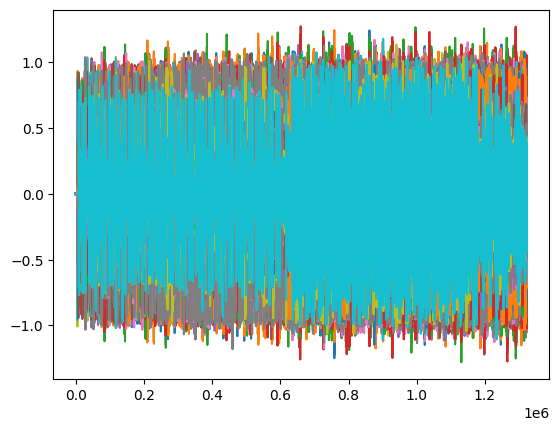

In [6]:
start_up = False
if __name__ == "__main__":
    if not start_up:
        from frequencysplitter import frequency_splitter_Short_30CUT, frequency_splitter_Short_60CUT, \
            frequency_splitter_Medium_30CUT, frequency_splitter_Medium_60CUT

        frequency_splitter_Short_30CUT()

for_analysis/short/1/60CUT/
60CUT-Dijon - Many Times (Official Video).wav
for_analysis/short/1/60CUT/60CUT-Dijon - Many Times (Official Video).wav
(2646000, 2) 44100
1
2
3
4
5
6
7
8
9
10
11
Files already created for:60CUT-Dijon - Many Times (Official Video).wav
for_analysis/short/2/60CUT/
60CUT-Badmon.wav
for_analysis/short/2/60CUT/60CUT-Badmon.wav
(2646000, 2) 44100
1
2
3
4
5
6
7
8
9
10
11
Files already created for:60CUT-Badmon.wav
for_analysis/short/3/60CUT/
60CUT-Nathan Dawe x KSI - Lighter (Shapes Remix).wav
for_analysis/short/3/60CUT/60CUT-Nathan Dawe x KSI - Lighter (Shapes Remix).wav
(2646000, 2) 44100
1
2
3
4
5
6
7
8
9
10
11
Files already created for:60CUT-Nathan Dawe x KSI - Lighter (Shapes Remix).wav
for_analysis/short/4/60CUT/
60CUT-BUZZCUT FEAT DANNY BROWN - BROCKHAMPTON.wav
for_analysis/short/4/60CUT/60CUT-BUZZCUT FEAT DANNY BROWN - BROCKHAMPTON.wav
(2646000, 2) 44100
1
2
3
4
5
6
7
8
9
10
11
Files already created for:60CUT-BUZZCUT FEAT DANNY BROWN - BROCKHAMPTON.wav
for_an

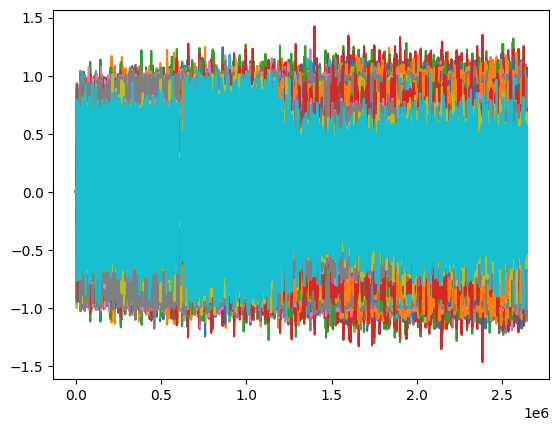

In [8]:
start_up = False
if __name__ == "__main__":
    if not start_up:
        from frequencysplitter import frequency_splitter_Short_30CUT, frequency_splitter_Short_60CUT, \
            frequency_splitter_Medium_30CUT, frequency_splitter_Medium_60CUT

        frequency_splitter_Short_60CUT()


In [9]:
start_up = False
if __name__ == "__main__":
    if not start_up:
        from frequencysplitter import frequency_splitter_Short_30CUT, frequency_splitter_Short_60CUT, \
            frequency_splitter_Medium_30CUT, frequency_splitter_Medium_60CUT

        frequency_splitter_Medium_30CUT()


for_analysis/medium/1/30CUT
for_analysis/medium/1/30CUT/
30CUT-Bad Books Forest Whitaker.mp3
for_analysis/medium/1/30CUT/30CUT-Bad Books Forest Whitaker.mp3
(1323000, 2) 44100
1
2
3
4
5
6
7
8
9
10
11
Files already created for:30CUT-Bad Books Forest Whitaker.mp3
for_analysis/medium/2/30CUT
for_analysis/medium/2/30CUT/
30CUT-Biffy Clyro - Machines [OFFICIAL VIDEO].wav
for_analysis/medium/2/30CUT/30CUT-Biffy Clyro - Machines [OFFICIAL VIDEO].wav
(1323000, 2) 44100
1
2
3
4
5
6
7
8
9
10
11
Files already created for:30CUT-Biffy Clyro - Machines [OFFICIAL VIDEO].wav
for_analysis/medium/3/30CUT
for_analysis/medium/3/30CUT/
30CUT-Pink Lemonade  The Wombats.wav
for_analysis/medium/3/30CUT/30CUT-Pink Lemonade  The Wombats.wav
(1323000, 2) 44100
1
2
3
4
5
6
7
8
9
10
11
Files already created for:30CUT-Pink Lemonade  The Wombats.wav
for_analysis/medium/4/30CUT
for_analysis/medium/4/30CUT/
30CUT-Fred again - Dermot (See Yourself In My Eyes).wav
for_analysis/medium/4/30CUT/30CUT-Fred again - Dermot (S

MemoryError: Unable to allocate 20.2 MiB for an array with shape (2, 1323000) and data type float64

MemoryError: Unable to allocate 20.2 MiB for an array with shape (2, 1323000) and data type float64

<Figure size 640x480 with 1 Axes>

In [ ]:
start_up = False
if __name__ == "__main__":
    if not start_up:
        from frequencysplitter import frequency_splitter_Short_30CUT, frequency_splitter_Short_60CUT, \
            frequency_splitter_Medium_30CUT, frequency_splitter_Medium_60CUT

        frequency_splitter_Medium_60CUT()

In [ ]:
def get_data(folder_type_input, cut_type_input, band_select_input, band_select_main):
    import os
    import soundfile as sf
    from matplotlib import pyplot as plt
    import csv
    import time
    import gc
    import bz2
    folder_number = 1
    while folder_number <= 50:
        folder_number_str = str(folder_number)
        folder_type = folder_type_input
        cut_type = cut_type_input
        band_select = band_select_input

        #Deletes previous data stored for storage saving
        def delete_previous_data():
            import os
            dir_name = 'for_analysis/' + folder_type + folder_number_str + cut_type + band_select
            delete = os.listdir(dir_name)

            for item in delete:
                if item.endswith(".CSV"):
                    os.remove(os.path.join(dir_name, item))
                    print('Previous .CSV file deleted')
                if item.endswith(".CSV.BZ2"):
                    os.remove(os.path.join(dir_name, item))
                    print('Previous .BZ2 file deleted')

        delete_previous_data()
        audio_file_dir = os.listdir('for_analysis/' + folder_type + folder_number_str + cut_type + band_select)[0]
        audio_dir = 'for_analysis/' + folder_type + folder_number_str + cut_type + band_select
        print(audio_dir)
        print(audio_file_dir)
        length = len(audio_dir)
        file_format = audio_dir[length - 3:]
        full_path = audio_dir + audio_file_dir
        print(full_path)
        data, fs = sf.read(full_path)
        print(data.shape, fs)
        graph = plt.plot(data)
        plt.xlabel('time')
        plt.ylabel('dB')

        xydata = graph[0].get_data()
        print(xydata)
        with bz2.open (audio_dir + band_select_main, 'wt') as output:
            writer = csv.writer(output)
            writer.writerow(['x', 'y'])
            for i in range(len(xydata[0])):
                writer.writerow([xydata[0][i], xydata[1][i]])


        plt.show()
        folder_number = folder_number + 1
        time.sleep(0.1)
        gc.collect(generation=2)


get_data('short/', '/30CUT/', 'DEEPBASS/', 'DEEPBASS.CSV.BZ2')
get_data('short/', '/30CUT/', 'LOWBASS/', 'LOWBASS.CSV.BZ2')
get_data('short/', '/30CUT/', 'MIDBASS/', 'MIDBASS.CSV.BZ2')
get_data('short/', '/30CUT/', 'UPPERBASS/', 'UPPERBASS.CSV')
get_data('short/', '/30CUT/', 'LOWERMIDRANGE/', 'LOWERMIDRANGE.CSV.BZ2')
get_data('short/', '/30CUT/', 'MIDDLEMIDRANGE/', 'MIDDLEMIDRANGE.CSV.BZ2')
get_data('short/', '/30CUT/', 'UPPERMIDRANGE/', 'UPPERMIDRANGE.CSV.BZ2')
get_data('short/', '/30CUT/', 'PRESENCERANGE/', 'PRESENCERANGE.CSV.BZ2')
get_data('short/', '/30CUT/', 'HIGHEND/', 'HIGHEND.CSV.BZ2')
get_data('short/', '/30CUT/', 'EXTREMEHIGHEND/', 'EXTREMEHIGHEND.CSV.BZ2')
get_data('short/', '/30CUT/', 'HYPERHIGHEND/', 'HYPERHIGHEND.CSV.BZ2')

get_data('short/', '/60CUT/', 'DEEPBASS/', 'DEEPBASS.CSV.BZ2')
get_data('short/', '/60CUT/', 'LOWBASS/', 'LOWBASS.CSV.BZ2')
get_data('short/', '/60CUT/', 'MIDBASS/', 'MIDBASS.CSV.BZ2')
get_data('short/', '/60CUT/', 'UPPERBASS/', 'UPPERBASS.CSV.BZ2')
get_data('short/', '/60CUT/', 'LOWERMIDRANGE/', 'LOWERMIDRANGE.CSV.BZ2')
get_data('short/', '/60CUT/', 'MIDDLEMIDRANGE/', 'MIDDLEMIDRANGE.CSV.BZ2')
get_data('short/', '/60CUT/', 'UPPERMIDRANGE/', 'UPPERMIDRANGE.CSV.BZ2')
get_data('short/', '/60CUT/', 'PRESENCERANGE/', 'PRESENCERANGE.BZ2')
get_data('short/', '/60CUT/', 'HIGHEND/', 'HIGHEND.CSV.BZ2')
get_data('short/', '/60CUT/', 'EXTREMEHIGHEND/', 'EXTREMEHIGHEND.CSV.BZ2')
get_data('short/', '/60CUT/', 'HYPERHIGHEND/', 'HYPERHIGHEND.CSV.BZ2')

get_data('medium/', '/30CUT/', 'DEEPBASS/', 'DEEPBASS.CSV.BZ2')
get_data('medium/', '/30CUT/', 'LOWBASS/', 'LOWBASS.CSV.BZ2')
get_data('medium/', '/30CUT/', 'MIDBASS/', 'MIDBASS.CSV.BZ2')
get_data('medium/', '/30CUT/', 'UPPERBASS/', 'UPPERBASS.CSV.BZ2')
get_data('medium/', '/30CUT/', 'LOWERMIDRANGE/', 'LOWERMIDRANGE.CSV.BZ2')
get_data('medium/', '/30CUT/', 'MIDDLEMIDRANGE/', 'MIDDLEMIDRANGE.CSV.BZ2')
get_data('medium/', '/30CUT/', 'UPPERMIDRANGE/', 'UPPERMIDRANGE.CSV.BZ2')
get_data('medium/', '/30CUT/', 'PRESENCERANGE/', 'PRESENCERANGE.CSV.BZ2')
get_data('medium/', '/30CUT/', 'HIGHEND/', 'HIGHEND.CSV.BZ2')
get_data('medium/', '/30CUT/', 'EXTREMEHIGHEND/', 'EXTREMEHIGHEND.CSV.BZ2')
get_data('medium/', '/30CUT/', 'HYPERHIGHEND/', 'HYPERHIGHEND.CSV.BZ2')

get_data('medium/', '/60CUT/', 'DEEPBASS/', 'DEEPBASS.CSV.BZ2')
get_data('medium/', '/60CUT/', 'LOWBASS/', 'LOWBASS.CSV.BZ2')
get_data('medium/', '/60CUT/', 'MIDBASS/', 'MIDBASS.CSV.BZ2')
get_data('medium/', '/60CUT/', 'UPPERBASS/', 'UPPERBASS.CSV.BZ2')
get_data('medium/', '/60CUT/', 'LOWERMIDRANGE/', 'LOWERMIDRANGE.CSV.BZ2')
get_data('medium/', '/60CUT/', 'MIDDLEMIDRANGE/', 'MIDDLEMIDRANGE.CSV.BZ2')
get_data('medium/', '/60CUT/', 'UPPERMIDRANGE/', 'UPPERMIDRANGE.CSV.BZ2')
get_data('medium/', '/60CUT/', 'PRESENCERANGE/', 'PRESENCERANGE.CSV.BZ2')
get_data('medium/', '/60CUT/', 'HIGHEND/', 'HIGHEND.CSV.BZ2')
get_data('medium/', '/60CUT/', 'EXTREMEHIGHEND/', 'EXTREMEHIGHEND.CSV.BZ2')
get_data('medium/', '/60CUT/', 'HYPERHIGHEND/', 'HYPERHIGHEND.CSV.BZ2')






In [ ]:
import os
import time

time.sleep(145)
print('goin sleepy time')
os.system("shutdown /s /t 1")

In [ ]:
from uncompress_bz2_to_csv import uncompress_bz2_to_csv_func
import os
import glob
import pandas as pd
os.chdir("/mydir")

In [ ]:
def change_xy_values(folder_type_input, cut_type_input, band_select_input, band_select_main):
    import pandas as pd
    import os
    from uncompress_bz2_to_csv import uncompress_bz2_to_csv_func
    import gc

    pd.options.display.float_format = '{:,.0f}'.format
    master_df_data = [0]
    master_df = pd.DataFrame(master_df_data)

    folder_number = 1

    folder_number_str = str(folder_number)
    folder_type = folder_type_input
    cut_type = cut_type_input
    band_select = band_select_input
    band_select_main_input = band_select_main
    band_select_csv_output = band_select[:-1]
    band_select_csv_output = band_select_csv_output + '.CSV'
    if not os.path.exists('for_analysis/' + folder_type[:-1] + cut_type + band_select[:-1]):
        os.makedirs('for_analysis/' + folder_type[:-1] + cut_type + band_select[:-1])
        master_df.to_csv('for_analysis/' + folder_type[:-1] + cut_type + band_select + band_select_csv_output, index=False)
        print(cut_type + band_select[:-1] +' Master File Created')

    while folder_number <= 50:

        folder_number_str = str(folder_number)
        print('Transfering data...' + folder_number_str)
        folder_type = folder_type_input
        cut_type = cut_type_input
        band_select = band_select_input
        band_select_main_input = band_select_main
        uncompress_bz2_to_csv_func(folder_type, cut_type, band_select, band_select_main_input, folder_number)
        #os.remove('for_analysis/' + folder_type + folder_number_str + cut_type + band_select + band_select_main_input)
        band_select_main_input = band_select_main_input[:-4]
        csv_dir = 'for_analysis/' + folder_type + folder_number_str + cut_type + band_select + band_select_main_input

        df = pd.read_csv(csv_dir)
        print(df.shape)
        xchange = 'x' + folder_number_str
        ychange = 'y' + folder_number_str
        df = df.rename(columns={'x': xchange, 'y': ychange})
        df.to_csv(csv_dir, index=False)
        df1 = pd.read_csv(csv_dir)
        df2 = pd.read_csv('for_analysis/' + folder_type[:-1] + cut_type + band_select + band_select_csv_output)
        df2.to_csv('for_analysis/' + folder_type[:-1] + cut_type + band_select + band_select_csv_output, index=False)
        df2 = pd.read_csv('for_analysis/' + folder_type[:-1] + cut_type + band_select + band_select_csv_output)
        print('Transfering data....' + folder_number_str)
        df3 = pd.concat([df2, df1], axis=1)
        df3.to_csv('for_analysis/' + folder_type[:-1] + cut_type + band_select + band_select_csv_output, index=False)
        os.remove(csv_dir)
        print('Transfering data.....' + folder_number_str)
        gc.collect(generation=2)
        folder_number = folder_number + 1
    if folder_number == 51:
        print(cut_type + band_select[:-1] +' Finished')
        gc.collect(generation=2)


change_xy_values('short/', '/30CUT/', 'DEEPBASS/', 'DEEPBASS.CSV.BZ2')
change_xy_values('short/', '/30CUT/', 'LOWBASS/', 'LOWBASS.CSV.BZ2')
change_xy_values('short/', '/30CUT/', 'MIDBASS/', 'MIDBASS.CSV.BZ2')
change_xy_values('short/', '/30CUT/', 'UPPERBASS/', 'UPPERBASS.CSV')
change_xy_values('short/', '/30CUT/', 'LOWERMIDRANGE/', 'LOWERMIDRANGE.CSV.BZ2')
change_xy_values('short/', '/30CUT/', 'MIDDLEMIDRANGE/', 'MIDDLEMIDRANGE.CSV.BZ2')
change_xy_values('short/', '/30CUT/', 'UPPERMIDRANGE/', 'UPPERMIDRANGE.CSV.BZ2')
change_xy_values('short/', '/30CUT/', 'PRESENCERANGE/', 'PRESENCERANGE.CSV.BZ2')
change_xy_values('short/', '/30CUT/', 'HIGHEND/', 'HIGHEND.CSV.BZ2')
change_xy_values('short/', '/30CUT/', 'EXTREMEHIGHEND/', 'EXTREMEHIGHEND.CSV.BZ2')
change_xy_values('short/', '/30CUT/', 'HYPERHIGHEND/', 'HYPERHIGHEND.CSV.BZ2')

change_xy_values('short/', '/60CUT/', 'DEEPBASS/', 'DEEPBASS.CSV.BZ2')
change_xy_values('short/', '/60CUT/', 'LOWBASS/', 'LOWBASS.CSV.BZ2')
change_xy_values('short/', '/60CUT/', 'MIDBASS/', 'MIDBASS.CSV.BZ2')
change_xy_values('short/', '/60CUT/', 'UPPERBASS/', 'UPPERBASS.CSV.BZ2')
change_xy_values('short/', '/60CUT/', 'LOWERMIDRANGE/', 'LOWERMIDRANGE.CSV.BZ2')
change_xy_values('short/', '/60CUT/', 'MIDDLEMIDRANGE/', 'MIDDLEMIDRANGE.CSV.BZ2')
change_xy_values('short/', '/60CUT/', 'UPPERMIDRANGE/', 'UPPERMIDRANGE.CSV.BZ2')
change_xy_values('short/', '/60CUT/', 'PRESENCERANGE/', 'PRESENCERANGE.BZ2')
change_xy_values('short/', '/60CUT/', 'HIGHEND/', 'HIGHEND.CSV.BZ2')
change_xy_values('short/', '/60CUT/', 'EXTREMEHIGHEND/', 'EXTREMEHIGHEND.CSV.BZ2')
change_xy_values('short/', '/60CUT/', 'HYPERHIGHEND/', 'HYPERHIGHEND.CSV.BZ2')

change_xy_values('medium/', '/30CUT/', 'DEEPBASS/', 'DEEPBASS.CSV.BZ2')
change_xy_values('medium/', '/30CUT/', 'LOWBASS/', 'LOWBASS.CSV.BZ2')
change_xy_values('medium/', '/30CUT/', 'MIDBASS/', 'MIDBASS.CSV.BZ2')
change_xy_values('medium/', '/30CUT/', 'UPPERBASS/', 'UPPERBASS.CSV.BZ2')
change_xy_values('medium/', '/30CUT/', 'LOWERMIDRANGE/', 'LOWERMIDRANGE.CSV.BZ2')
change_xy_values('medium/', '/30CUT/', 'MIDDLEMIDRANGE/', 'MIDDLEMIDRANGE.CSV.BZ2')
change_xy_values('medium/', '/30CUT/', 'UPPERMIDRANGE/', 'UPPERMIDRANGE.CSV.BZ2')
change_xy_values('medium/', '/30CUT/', 'PRESENCERANGE/', 'PRESENCERANGE.CSV.BZ2')
change_xy_values('medium/', '/30CUT/', 'HIGHEND/', 'HIGHEND.CSV.BZ2')
change_xy_values('medium/', '/30CUT/', 'EXTREMEHIGHEND/', 'EXTREMEHIGHEND.CSV.BZ2')
change_xy_values('medium/', '/30CUT/', 'HYPERHIGHEND/', 'HYPERHIGHEND.CSV.BZ2')

change_xy_values('medium/', '/60CUT/', 'DEEPBASS/', 'DEEPBASS.CSV.BZ2')
change_xy_values('medium/', '/60CUT/', 'LOWBASS/', 'LOWBASS.CSV.BZ2')
change_xy_values('medium/', '/60CUT/', 'MIDBASS/', 'MIDBASS.CSV.BZ2')
change_xy_values('medium/', '/60CUT/', 'UPPERBASS/', 'UPPERBASS.CSV.BZ2')
change_xy_values('medium/', '/60CUT/', 'LOWERMIDRANGE/', 'LOWERMIDRANGE.CSV.BZ2')
change_xy_values('medium/', '/60CUT/', 'MIDDLEMIDRANGE/', 'MIDDLEMIDRANGE.CSV.BZ2')
change_xy_values('medium/', '/60CUT/', 'UPPERMIDRANGE/', 'UPPERMIDRANGE.CSV.BZ2')
change_xy_values('medium/', '/60CUT/', 'PRESENCERANGE/', 'PRESENCERANGE.CSV.BZ2')
change_xy_values('medium/', '/60CUT/', 'HIGHEND/', 'HIGHEND.CSV.BZ2')
change_xy_values('medium/', '/60CUT/', 'EXTREMEHIGHEND/', 'EXTREMEHIGHEND.CSV.BZ2')
change_xy_values('medium/', '/60CUT/', 'HYPERHIGHEND/', 'HYPERHIGHEND.CSV.BZ2')

/30CUT/DEEPBASS Master File Created
Transfering data...1
(1323000, 2)
Transfering data....1
Transfering data.....1
Transfering data...2
(1323000, 2)
Transfering data....2
Transfering data.....2
Transfering data...3
(1323000, 2)
Transfering data....3
Transfering data.....3
Transfering data...4
(1323000, 2)
Transfering data....4
Transfering data.....4
Transfering data...5
(1323000, 2)
Transfering data....5
Transfering data.....5
Transfering data...6
(1323000, 2)
Transfering data....6
Transfering data.....6
Transfering data...7
(1323000, 2)
Transfering data....7
Transfering data.....7
Transfering data...8
(1323000, 2)
Transfering data....8
Transfering data.....8
Transfering data...9
(1323000, 2)
Transfering data....9
Transfering data.....9
Transfering data...10
(1323000, 2)
Transfering data....10
Transfering data.....10
Transfering data...11
(1323000, 2)
Transfering data....11
Transfering data.....11
Transfering data...12
(1323000, 2)
Transfering data....12
Transfering data.....12
Transfe